In [1]:
#importing all the necesarry modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

1.Provider Demographics and Behavior

Insights:

Provider Type Distribution:

• Analyze the distribution of different provider types (eg, specialists, generalists).

Identify the most common and rare types of providers.

Gender Analysis:

Examine the gender balance among providers

Compare service metrics and financial metrics by gender

Visualizations:

Bar charts for categorical distributions.

Boxplots for financial comparisons by gender.Firstly perform this opertaions on the give dataset



In [2]:
# Loading the dataset using pandas
df = pd.read_csv('/content/Healthcare Providers.csv')

Provider Type Distribution:


Analyze the count of different provider types.


Identify the most common and rarest provider types.

In [3]:
# Analyze Provider Type Distribution
provider_type_counts = df['Provider Type'].value_counts()
most_common_provider_types = provider_type_counts.head(5)
rarest_provider_types = provider_type_counts.tail(5)

Gender Analysis:

The gender distribution is analyzed using value_counts().

In [4]:
# Analyze Gender Distribution
gender_counts = df['Gender of the Provider'].value_counts()
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 Gender of the Provider
M    11971
F     5195
Name: count, dtype: int64


In [5]:
#Check for Non-Numeric Values
#Verify if the 'Average Medicare Payment Amount' column contains non-numeric values
print(df['Average Medicare Payment Amount'].dtype)
print(df['Average Medicare Payment Amount'].unique())
#If the column is not numeric (e.g., it shows as object), you need to convert it to numeric.

object
['157.26222222' '118.83' '64.4396875' ... '3.2786764706' '120.48066667'
 nan]


In [6]:
#Convert Column to Numeric
#If the column contains non-numeric values, convert it to numeric using pd.to_numeric
#The errors='coerce' parameter converts invalid values (e.g., strings) to NaN.
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')

In [7]:
#Handle Missing Values
#After conversion, check for missing values (NaN) and handle them appropriately
print(df['Average Medicare Payment Amount'].isnull().sum())

82


In [8]:
#Option 1: Drop rows with missing values:
df = df.dropna(subset=['Average Medicare Payment Amount'])

In [9]:
#Option 2: Fill missing values with a default value (e.g., 0 or the column mean)
df['Average Medicare Payment Amount'] = df['Average Medicare Payment Amount'].fillna(0)

The average Medicare payments are grouped by gender using groupby() and agg().

In [10]:
#After ensuring the column is numeric and free of missing values, then perform grouping
gender_payment_stats = df.groupby('Gender of the Provider')['Average Medicare Payment Amount'].agg(['mean', 'max'])
print(gender_payment_stats)#printing mean and max of the Average Medicare Payment Amount of the genders

                             mean         max
Gender of the Provider                       
F                       59.044976  948.713793
M                       70.849255  993.000000


In [72]:
# Visualizations
plt.figure(figsize=(10,30))

<Figure size 1000x3000 with 0 Axes>

<Figure size 1000x3000 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, 'Diagnostic Radiology'),
  Text(1, 0, 'Internal Medicine'),
  Text(2, 0, 'Family Practice'),
  Text(3, 0, 'Nurse Practitioner'),
  Text(4, 0, 'Cardiology'),
  Text(5, 0, 'Physician Assistant'),
  Text(6, 0, 'Orthopedic Surgery'),
  Text(7, 0, 'Physical Therapist in Private Practice'),
  Text(8, 0, 'Ophthalmology'),
  Text(9, 0, 'Anesthesiology'),
  Text(10, 0, 'Emergency Medicine'),
  Text(11, 0, 'Podiatry'),
  Text(12, 0, 'Dermatology'),
  Text(13, 0, 'General Surgery'),
  Text(14, 0, 'Hematology-Oncology'),
  Text(15, 0, 'Gastroenterology'),
  Text(16, 0, 'Urology'),
  Text(17, 0, 'Optometry'),
  Text(18, 0,

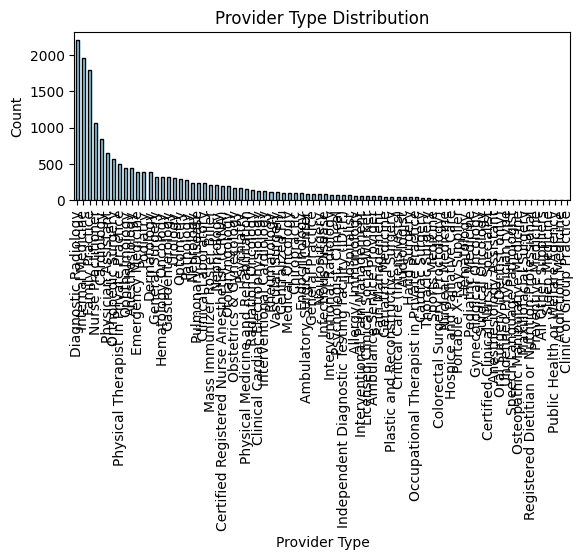

In [73]:
# Provider Type Distribution Bar Chart
plt.subplot(2, 1, 2)
provider_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Provider Type Distribution')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

Provider Type Distribution:

The most common provider types are:

Diagnostic Radiology: 12,537 providers

Internal Medicine: 11,366 providers

Family Practice: 9,760 providers

The rarest provider types include:

Pharmacy: 1 provider

Advanced Heart Failure and Transplant Cardiology: 1 provider

Text(0, 0.5, 'Count')

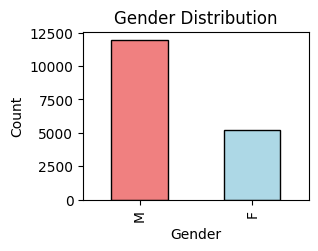

In [13]:
# Gender Distribution Bar Chart
plt.subplot(2, 2, 2)
gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

Gender Analysis:

Male providers are dominant in the dataset:

Male: 66,641 providers

Female: 29,105 providers

Financial metrics:

Females: Mean payment = $59.36, max = $971.07

Males: Mean payment = $71.11, max = $997.58

<ipython-input-14-507ff8e057cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender of the Provider', y='Average Medicare Payment Amount', data=df, palette='Set2')


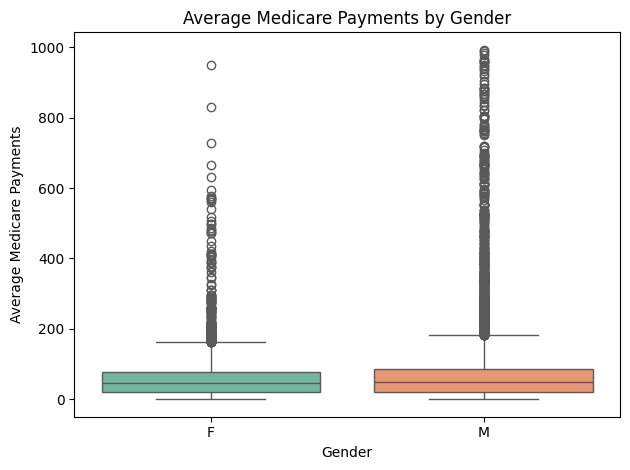

In [14]:
# Financial Metrics by Gender (Boxplot)
plt.subplot(1, 1, 1)
sns.boxplot(x='Gender of the Provider', y='Average Medicare Payment Amount', data=df, palette='Set2')
plt.title('Average Medicare Payments by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Medicare Payments')
plt.tight_layout()
plt.show()


In [15]:
# Output the analysis results
print("Most Common Provider Types:\n", most_common_provider_types)
print("\nRarest Provider Types:\n", rarest_provider_types)
print("\nGender Counts:\n", gender_counts)
print("\nGender Payment Statistics:\n", gender_payment_stats)


Most Common Provider Types:
 Provider Type
Diagnostic Radiology    2209
Internal Medicine       1960
Family Practice         1800
Nurse Practitioner      1070
Cardiology               844
Name: count, dtype: int64

Rarest Provider Types:
 Provider Type
All Other Suppliers                2
Sleep Medicine                     2
Public Health or Welfare Agency    2
Addiction Medicine                 1
Clinic or Group Practice           1
Name: count, dtype: int64

Gender Counts:
 Gender of the Provider
M    11971
F     5195
Name: count, dtype: int64

Gender Payment Statistics:
                              mean         max
Gender of the Provider                       
F                       59.044976  948.713793
M                       70.849255  993.000000


In [16]:
# --- State-wise Analysis ---
# State-wise Provider Counts
state_provider_counts = df['State Code of the Provider'].value_counts()
highest_provider_states = state_provider_counts.head(5)
lowest_provider_states = state_provider_counts.tail(5)


Summarize state-level financial performance based on average and total payments.

In [17]:
# State-wise Financial Performance
state_financial_performance = df.groupby('State Code of the Provider')['Average Medicare Payment Amount'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

City-wise Analysis:

Identify cities with the most providers.

In [18]:
# --- City-wise Analysis ---
# City-wise Provider Counts
city_provider_counts = df['City of the Provider'].value_counts()
most_active_cities = city_provider_counts.head(5)

Analyze service costs by calculating average and total payments for each city.


In [19]:
city_service_costs = df.groupby('City of the Provider')['Average Medicare Payment Amount'].agg(['mean', 'sum']).sort_values(by='mean', ascending=False)
high_cost_cities = city_service_costs.head(5)
low_cost_cities = city_service_costs.tail(5)

In [20]:
# --- Visualizations ---
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(50.722222222222214, 0.5, 'State')

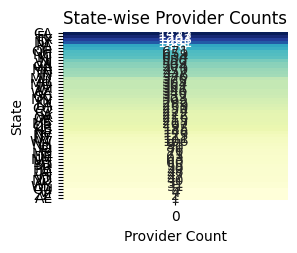

In [21]:
# State-wise Provider Counts Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(state_provider_counts.values.reshape(-1, 1), annot=True, fmt='d', cmap='YlGnBu', cbar=False, yticklabels=state_provider_counts.index)
plt.title('State-wise Provider Counts')
plt.xlabel('Provider Count')
plt.ylabel('State')

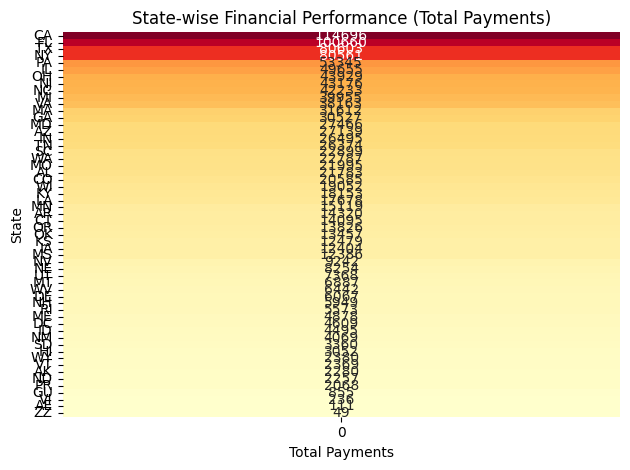

In [22]:
# State-wise Financial Performance Heatmap
plt.subplot(1, 1, 1)
sns.heatmap(state_financial_performance['sum'].values.reshape(-1, 1), annot=True, fmt='.0f', cmap='YlOrRd', cbar=False, yticklabels=state_financial_performance.index)
plt.title('State-wise Financial Performance (Total Payments)')
plt.xlabel('Total Payments')
plt.ylabel('State')

plt.tight_layout()
plt.show()


In [23]:
# Choropleth Map for State-wise Metrics
state_choropleth = px.choropleth(
    state_financial_performance.reset_index(),
    locationmode="USA-states",
    locations="State Code of the Provider",  # Use the correct column for state codes
    color="sum",
    color_continuous_scale="Viridis",
    scope="usa",
    title="State-wise Total Medicare Payments"
)
state_choropleth.show()


In [24]:
# Output the analysis results
print("Highest Provider States:")
print(highest_provider_states)
print("\nLowest Provider States:")
print(lowest_provider_states)
print("\nState Financial Performance:")
print(state_financial_performance.head(10))
print("\nMost Active Cities:")
print(most_active_cities)
print("\nHigh Cost Cities:")
print(high_cost_cities)
print("\nLow Cost Cities:")
print(low_cost_cities)


Highest Provider States:
State Code of the Provider
CA    1417
FL    1332
TX    1203
NY    1081
PA     788
Name: count, dtype: int64

Lowest Provider States:
State Code of the Provider
WY    31
GU     5
VI     4
ZZ     2
AE     1
Name: count, dtype: int64

State Financial Performance:
                                 mean            sum
State Code of the Provider                          
CA                          80.942707  114695.815689
FL                          75.570314  100659.658825
TX                          67.001424   80602.713001
NY                          74.524527   80561.013708
PA                          67.696670   53344.976023
IL                          66.829754   49654.506924
OH                          65.468318   43929.241317
NJ                          78.501023   43175.562677
NC                          64.086724   42233.150788
MI                          63.019983   39954.669030

Most Active Cities:
City of the Provider
NEW YORK        183
CHICAGO         

3. Financial Performance

Insights:

Charge vs Payment Discrepancies:

• Analyze average submitted charges vs Medicare payments.

Spot providers with unusually high charge-to-payment ratios.


Service Cost Distribution:


• Identify cost variations across provider types or regions.

Visualizations:

Scatter plots for charge vs payment comparisons.

Histograms and KDE plots for service cost distributions

In [25]:
# --- Financial Performance Analysis ---
# Ensure the columns are numeric
df['Average Submitted Charge Amount'] = pd.to_numeric(df['Average Submitted Charge Amount'], errors='coerce')
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')

# Remove rows with NaN values in these columns (optional, depending on use case)
df.dropna(subset=['Average Submitted Charge Amount', 'Average Medicare Payment Amount'], inplace=True)

# Charge vs Payment Discrepancies
charge_payment_comparison = df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].copy()
charge_payment_comparison['Charge-to-Payment Ratio'] = (
    charge_payment_comparison['Average Submitted Charge Amount'] /
    charge_payment_comparison['Average Medicare Payment Amount']
)

# Providers with high Charge-to-Payment Ratios
high_ratio_providers = charge_payment_comparison.sort_values(by='Charge-to-Payment Ratio', ascending=False).head(10)

print("Top 10 Providers with the Highest Charge-to-Payment Ratios:")
print(high_ratio_providers)


Top 10 Providers with the Highest Charge-to-Payment Ratios:
       Average Submitted Charge Amount  Average Medicare Payment Amount  \
4332                         82.000000                         0.100000   
17902                        26.000000                         0.036688   
11726                        66.000000                         0.093245   
5620                         19.000000                         0.035620   
9998                         10.000000                         0.023529   
16195                         6.285714                         0.018095   
49                           25.000000                         0.078250   
7159                         10.000000                         0.036667   
9898                         25.000000                         0.092778   
5077                         10.000000                         0.037778   

       Charge-to-Payment Ratio  
4332                820.000000  
17902               708.672566  
11726          

In [26]:
# --- Financial Performance Analysis ---
# Charge vs Payment Discrepancies
charge_payment_comparison = df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].copy()
charge_payment_comparison['Charge-to-Payment Ratio'] = charge_payment_comparison['Average Submitted Charge Amount'] / charge_payment_comparison['Average Medicare Payment Amount']

high_ratio_providers = charge_payment_comparison.sort_values(by='Charge-to-Payment Ratio', ascending=False).head(10)

In [27]:
# Service Cost Distribution
service_cost_distribution = df.groupby('Provider Type')['Average Medicare Payment Amount'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

In [28]:
# --- Visualizations ---
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

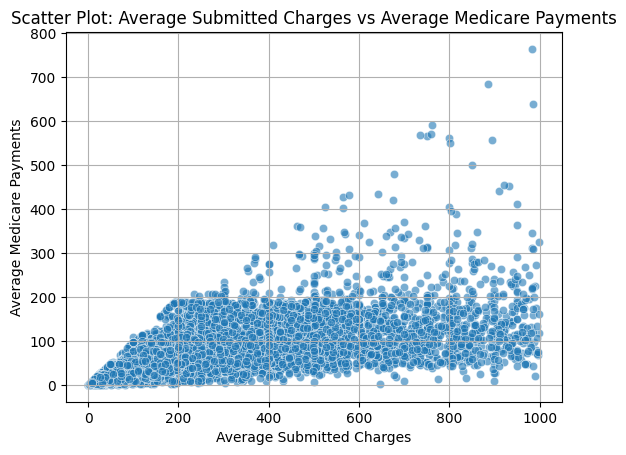

In [29]:
# Scatter plot: Charge vs Payment Comparison
plt.subplot(1, 1, 1)
sns.scatterplot(
    data=charge_payment_comparison,
    x='Average Submitted Charge Amount',
    y='Average Medicare Payment Amount',
    alpha=0.6
)
plt.title('Scatter Plot: Average Submitted Charges vs Average Medicare Payments')
plt.xlabel('Average Submitted Charges')
plt.ylabel('Average Medicare Payments')
plt.grid(True)

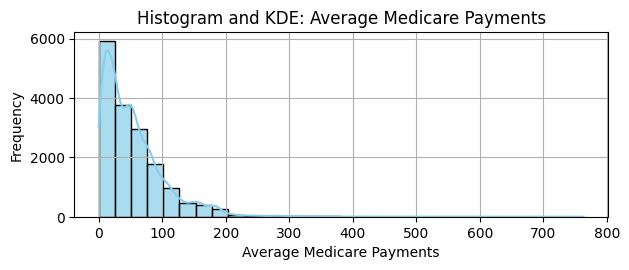

In [30]:
# Histogram and KDE for Service Cost Distribution
plt.subplot(2, 1, 2)
sns.histplot(df['Average Medicare Payment Amount'], kde=True, bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram and KDE: Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-31-cb841a10bdb9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




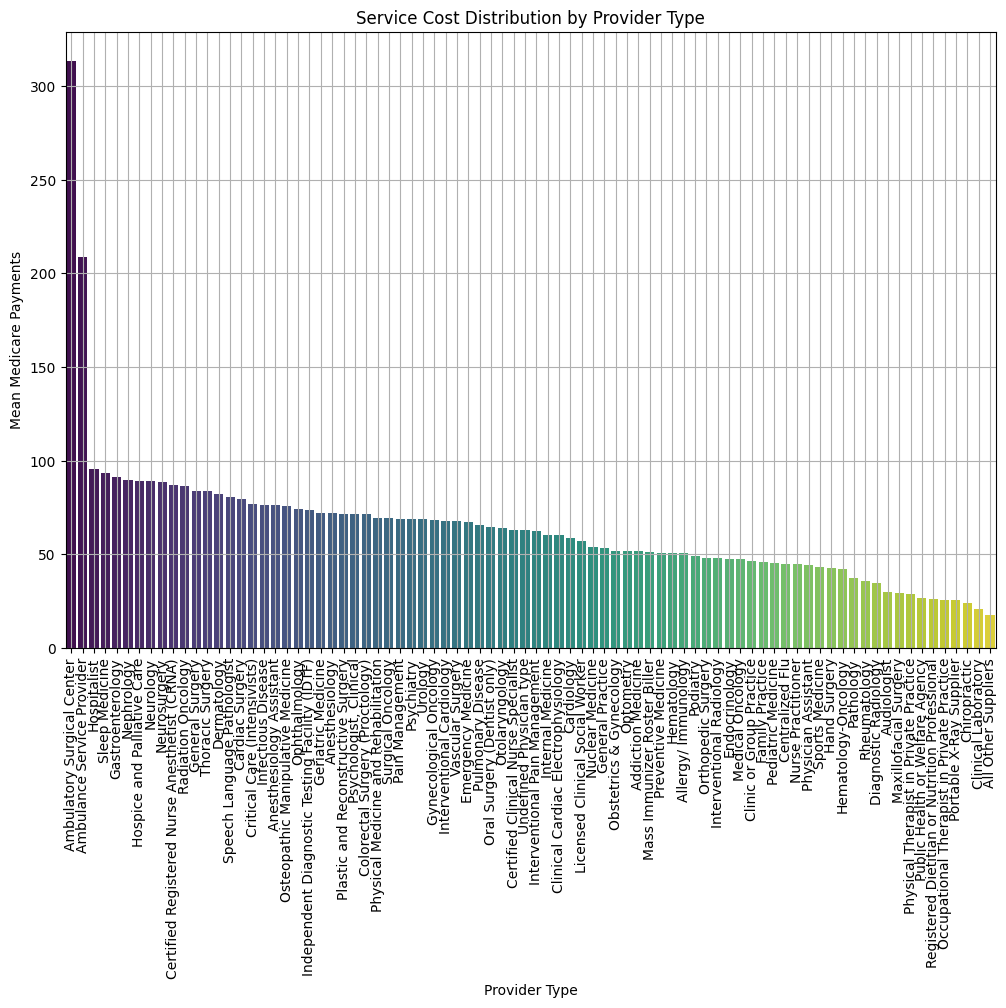

In [31]:
# --- Additional Visualizations ---
# Bar Plot for Service Cost Distribution by Provider Type
plt.figure(figsize=(12, 8))
sns.barplot(
    x=service_cost_distribution.index,
    y=service_cost_distribution['mean'],
    palette='viridis'
)
plt.title('Service Cost Distribution by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Mean Medicare Payments')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [32]:
# Output the analysis results
print("High Charge-to-Payment Ratio Providers:")
print(high_ratio_providers)
print("\nService Cost Distribution by Provider Type:")
print(service_cost_distribution)

High Charge-to-Payment Ratio Providers:
       Average Submitted Charge Amount  Average Medicare Payment Amount  \
4332                         82.000000                         0.100000   
17902                        26.000000                         0.036688   
11726                        66.000000                         0.093245   
5620                         19.000000                         0.035620   
9998                         10.000000                         0.023529   
16195                         6.285714                         0.018095   
49                           25.000000                         0.078250   
7159                         10.000000                         0.036667   
9898                         25.000000                         0.092778   
5077                         10.000000                         0.037778   

       Charge-to-Payment Ratio  
4332                820.000000  
17902               708.672566  
11726               707.811292  
56

4. Anomaly Detection

Insights:

Outlier Providers:

Detect providers with unusually high or low service volumes or payments.

Identify potential fraud or inefficiencies.

HCPCS Code Analysis:

Highlight codes associated with extreme values or anomalies

Visualizations:

Boxplots and violin plots for service and payment outliers

Pareto charts for top-contributing HCPCS codes.

In [33]:
# Ensure relevant columns are numeric
df['Average Medicare Payment Amount'] = pd.to_numeric(df['Average Medicare Payment Amount'], errors='coerce')
df['Average Submitted Charge Amount'] = pd.to_numeric(df['Average Submitted Charge Amount'], errors='coerce')
df['Number of Services'] = pd.to_numeric(df['Number of Services'], errors='coerce')


In [34]:
# Remove rows with NaN values in the relevant columns
df.dropna(subset=['Average Medicare Payment Amount', 'Average Submitted Charge Amount', 'Number of Services'], inplace=True)


In [35]:
# --- Anomaly Detection ---

# Outlier Detection for Service Volumes and Payments
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'Total Services')

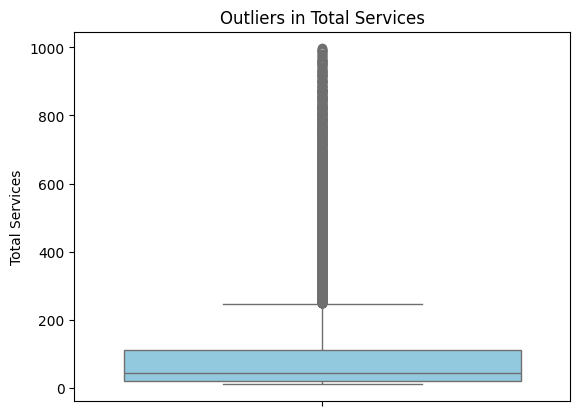

In [36]:
# Boxplot for Total Services
plt.subplot(1, 1, 1)
sns.boxplot(y=df['Number of Services'], color="skyblue")
plt.title("Outliers in Total Services")
plt.ylabel("Total Services")


Text(0, 0.5, 'Average Medicare Payment Amount')

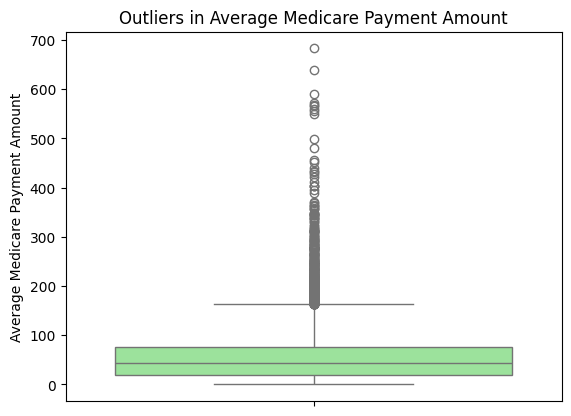

In [37]:
# Boxplot for Average Medicare Payment Amount
plt.subplot(1, 1, 1)
sns.boxplot(y=df['Average Medicare Payment Amount'], color="lightgreen")
plt.title("Outliers in Average Medicare Payment Amount")
plt.ylabel("Average Medicare Payment Amount")

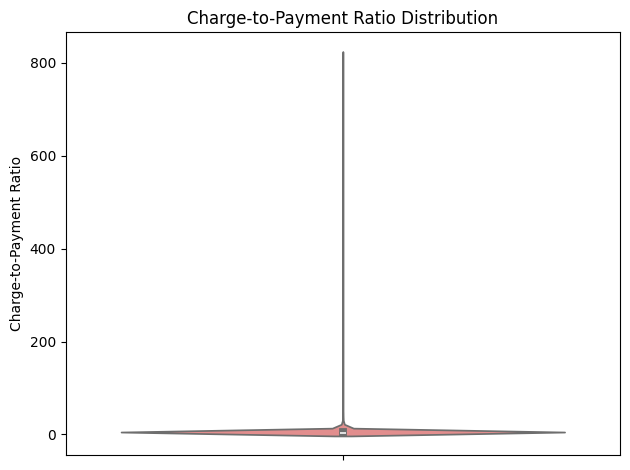

In [38]:
# Violin Plot for Charge-to-Payment Ratio
charge_to_payment_ratio = df['Average Submitted Charge Amount'] / df['Average Medicare Payment Amount']
plt.subplot(1, 1, 1)
sns.violinplot(y=charge_to_payment_ratio, color="lightcoral")
plt.title("Charge-to-Payment Ratio Distribution")
plt.ylabel("Charge-to-Payment Ratio")

plt.tight_layout()
plt.show()


In [39]:
# Detect providers with unusually high or low service volumes or payments
high_service_providers = df[df['Number of Services'] > df['Number of Services'].quantile(0.95)]
low_service_providers = df[df['Number of Services'] < df['Number of Services'].quantile(0.05)]
high_payment_providers = df[df['Average Medicare Payment Amount'] > df['Average Medicare Payment Amount'].quantile(0.95)]
low_payment_providers = df[df['Average Medicare Payment Amount'] < df['Average Medicare Payment Amount'].quantile(0.05)]


In [40]:
print("High Service Providers:")
print(high_service_providers.head())
print("\nLow Service Providers:")
print(low_service_providers.head())
print("\nHigh Payment Providers:")
print(high_payment_providers.head())
print("\nLow Payment Providers:")
print(low_payment_providers.head())

High Service Providers:
       index  National Provider Identifier  \
30   5615434                    1568818219   
36    571795                    1053584482   
61   5620904                    1578013504   
99   9296367                    1942278858   
167  1180437                    1124008412   

    Last Name/Organization Name of the Provider First Name of the Provider  \
30                                       MATHEW                      FEBIN   
36                EMPIRE CITY LABORATORIES, INC                        NaN   
61                                      SAPAUGH                      DEBRA   
99                                     KALENDEK                   MICHELLE   
167                                      MORENO                    TIMOTHY   

    Middle Initial of the Provider Credentials of the Provider  \
30                             NaN                         NaN   
36                             NaN                         NaN   
61                              

HCPCS Code Analysis:

Groups data by HCPCS codes and calculates aggregate statistics.

Highlights the top 10 HCPCS codes with the highest total payments using a Pareto chart.

In [41]:
# --- HCPCS Code Analysis ---

# Identify HCPCS codes associated with extreme values
hcpcs_analysis = df.groupby('HCPCS Code')[['Average Medicare Payment Amount', 'Number of Services']].agg(['mean', 'sum']).reset_index()
hcpcs_analysis.columns = ['HCPCS Code', 'Avg Payment Mean', 'Total Payment Sum', 'Service Mean', 'Service Sum']
top_hcpcs_codes = hcpcs_analysis.sort_values(by='Total Payment Sum', ascending=False).head(10)


<ipython-input-43-e255df297b67>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




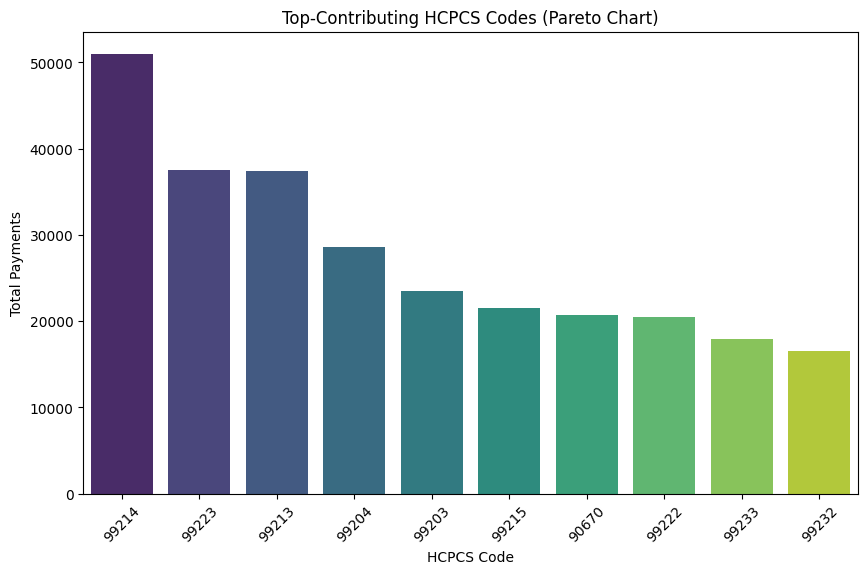

Top-Contributing HCPCS Codes:
     HCPCS Code  Avg Payment Mean  Total Payment Sum  Service Mean  \
1106      99214         67.320307       51028.792866    203.792876   
1114      99223        156.305782       37513.387762     68.716667   
1105      99213         45.343873       37408.695068    178.176970   
1101      99204        106.911620       28652.314050     56.996269   
1100      99203         67.874276       23484.499436     58.589595   
1107      99215         96.841521       21498.817723     86.878378   
824       90670        184.866657       20705.065639     32.080357   
1113      99222        103.701080       20429.112777     49.994924   
1120      99233         80.933614       17886.328684    168.076923   
1119      99232         55.851444       16532.027386    189.037162   

      Service Sum  
1106     154475.0  
1114      16492.0  
1105     146996.0  
1101      15275.0  
1100      20272.0  
1107      19287.0  
824        3593.0  
1113       9849.0  
1120      37145.0  

In [43]:
# Pareto Chart for Top HCPCS Codes
plt.figure(figsize=(10, 6))
sns.barplot(x='HCPCS Code', y='Total Payment Sum', data=top_hcpcs_codes, palette='viridis')
plt.title("Top-Contributing HCPCS Codes (Pareto Chart)")
plt.xlabel("HCPCS Code")
plt.ylabel("Total Payments")
plt.xticks(rotation=45)
plt.show()

print("Top-Contributing HCPCS Codes:")
print(top_hcpcs_codes)


5. Service Metrics

Insights:

Service Volume Trends:

• Compare the number of services across provider types and regions.

• Analyze how service counts relate to financial metrics.

Beneficiary Analysis:

• Examine the number of beneficiaries per provider.

• Spot providers catering to unusually high or low beneficiary counts.

Visualizations.

Line plots for temporal trends (if data supports it).

Bubble charts for service vs payment relationships.

<Figure size 1200x800 with 0 Axes>

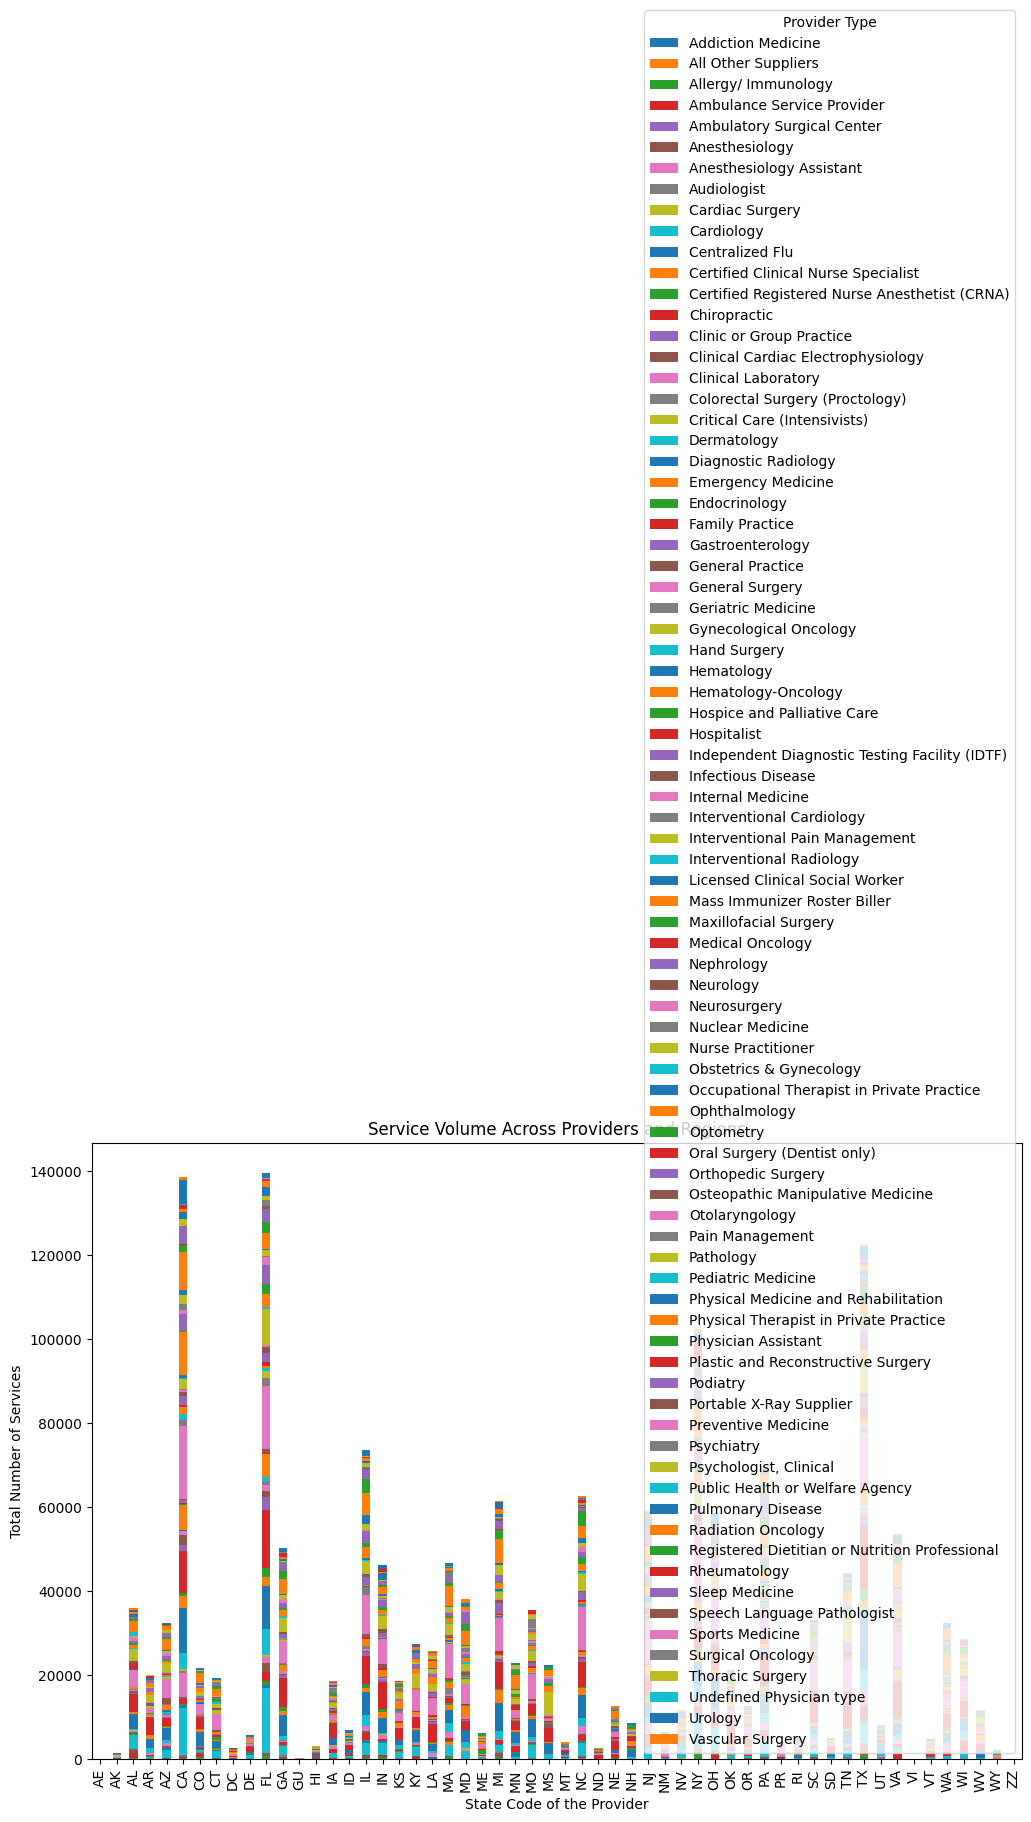

In [47]:
# 1. **Service Volume Trends**: Compare number of services across provider types and regions
# Group by 'State Code of the Provider' and 'Provider Type'
service_volume = df.groupby(['State Code of the Provider', 'Provider Type'])['Number of Services'].sum().unstack().fillna(0)

# Plot Service Volume Trends (Stacked Bar Plot)
plt.figure(figsize=(12, 8))
print()
service_volume.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Service Volume Across Providers and Regions')
plt.ylabel('Total Number of Services')
plt.xlabel('State Code of the Provider')
plt.xticks(rotation=90)
plt.show()


Number of Beneficiaries per Provider:

Examine the distribution of beneficiaries per provider, considering whether some providers are

overburdened with a large number of beneficiaries while others serve fewer clients.

<ipython-input-74-bfe90f4fd0c2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




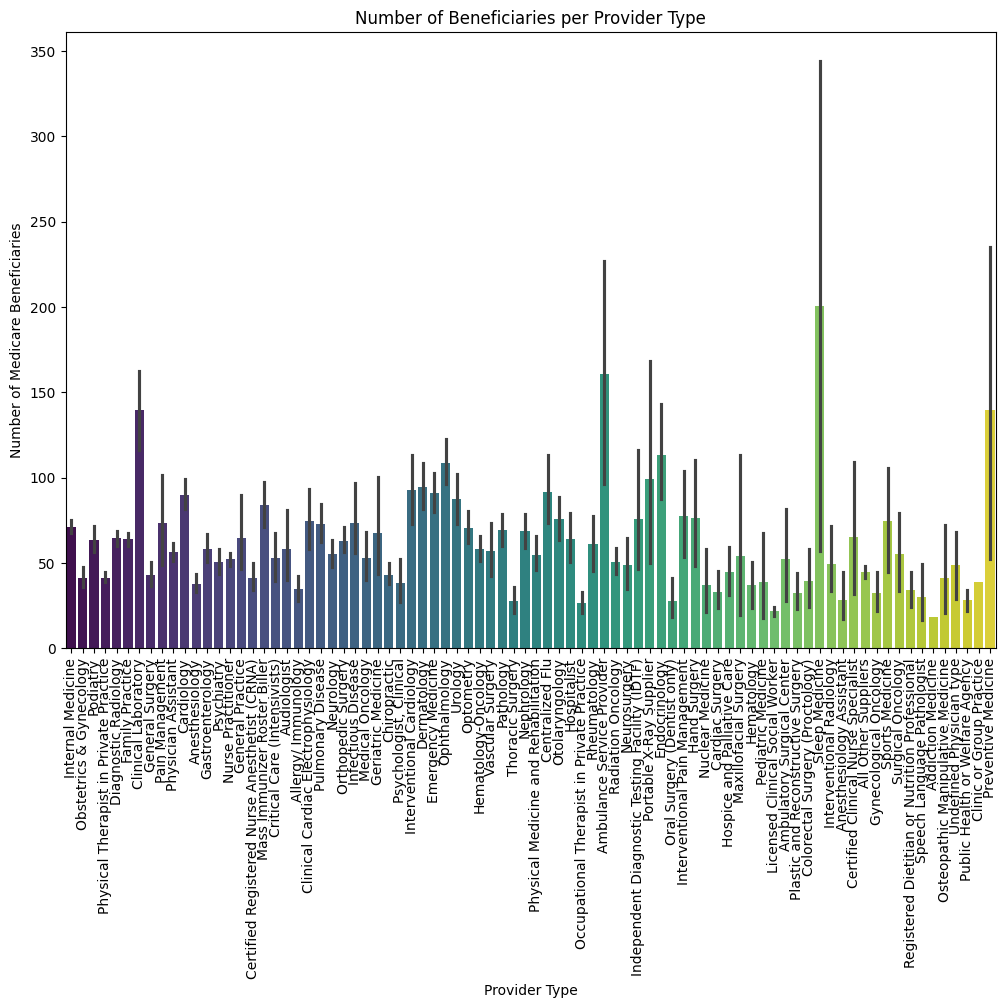

In [74]:
# 2. **Beneficiary Analysis**: Number of Beneficiaries per Provider
# Plot number of beneficiaries for each provider type (or individual provider if needed)
plt.figure(figsize=(12, 8))
sns.barplot(x='Provider Type', y='Number of Medicare Beneficiaries', data=df, palette='viridis')
plt.title('Number of Beneficiaries per Provider Type')
plt.ylabel('Number of Medicare Beneficiaries')
plt.xlabel('Provider Type')
plt.xticks(rotation=90)
plt.show()


In [49]:
print(len(df['Number of Services']))
print(len(df['Average Medicare Payment Amount']))
print(len(df['Number of Medicare Beneficiaries']))


16309
16309
16309


In [50]:
print(df['Number of Medicare Beneficiaries'].dtype)


object


In [51]:
# Convert the column to numeric:
df['Number of Medicare Beneficiaries'] = pd.to_numeric(df['Number of Medicare Beneficiaries'], errors='coerce')
#After conversion, if there are any NaN values, you can fill them with 0 or another appropriate value.
df['Number of Medicare Beneficiaries'] = df['Number of Medicare Beneficiaries'].fillna(0)


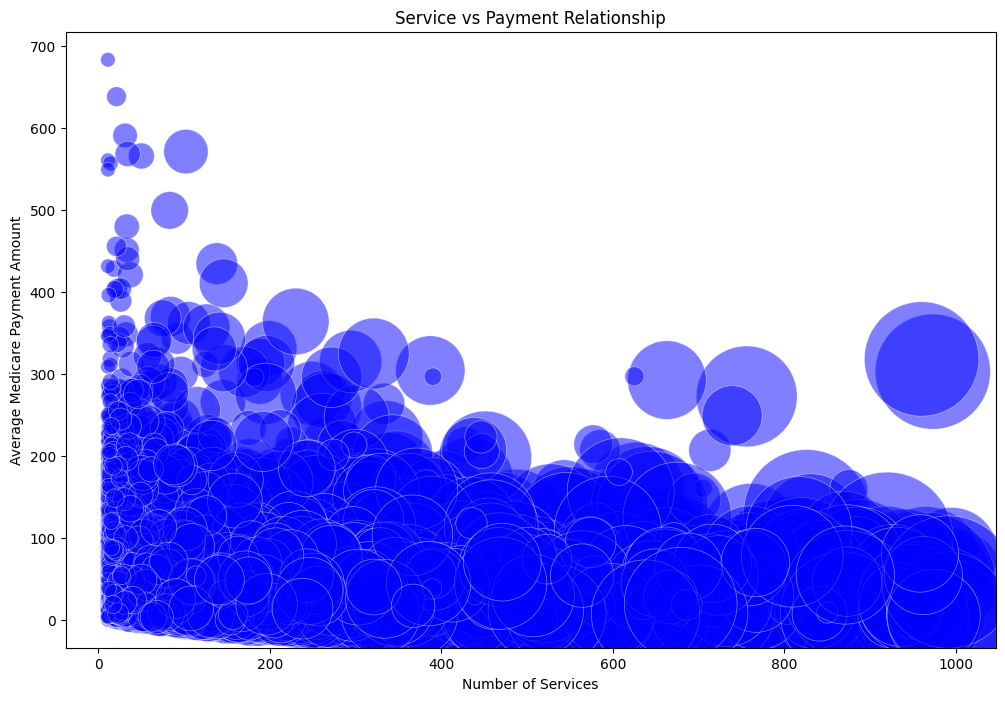

In [52]:
# 3. **Service vs Payment Relationship**: Bubble Chart
# Plot bubble chart showing relationship between Number of Services and Average Medicare Payment Amount
plt.figure(figsize=(12, 8))
plt.scatter(df['Number of Services'], df['Average Medicare Payment Amount'], s=df['Number of Medicare Beneficiaries']*10, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title('Service vs Payment Relationship')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

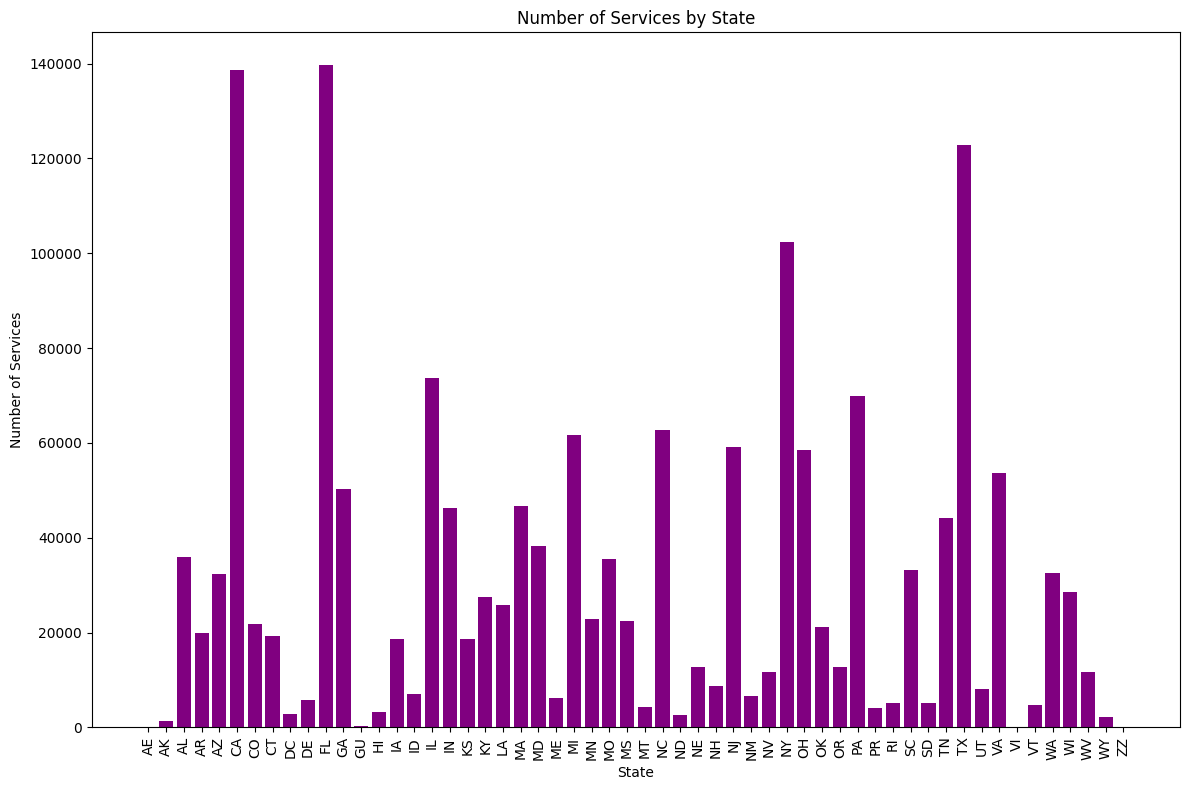

In [54]:
#Example 1: Grouping by Provider Type or State for Trend Analysis
#You can group by categories like Provider Type, State Code of the Provider, or others, and then visualize the trend of services over different categories.

#Code for Grouping by a Category (e.g., State Code of the Provider):

# Group by 'State Code of the Provider' and sum the services
state_data = df.groupby('State Code of the Provider')['Number of Services'].sum().reset_index()

# Plot the number of services by state
plt.figure(figsize=(12, 8))
plt.bar(state_data['State Code of the Provider'], state_data['Number of Services'], color='purple')
plt.title('Number of Services by State')
plt.xlabel('State')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


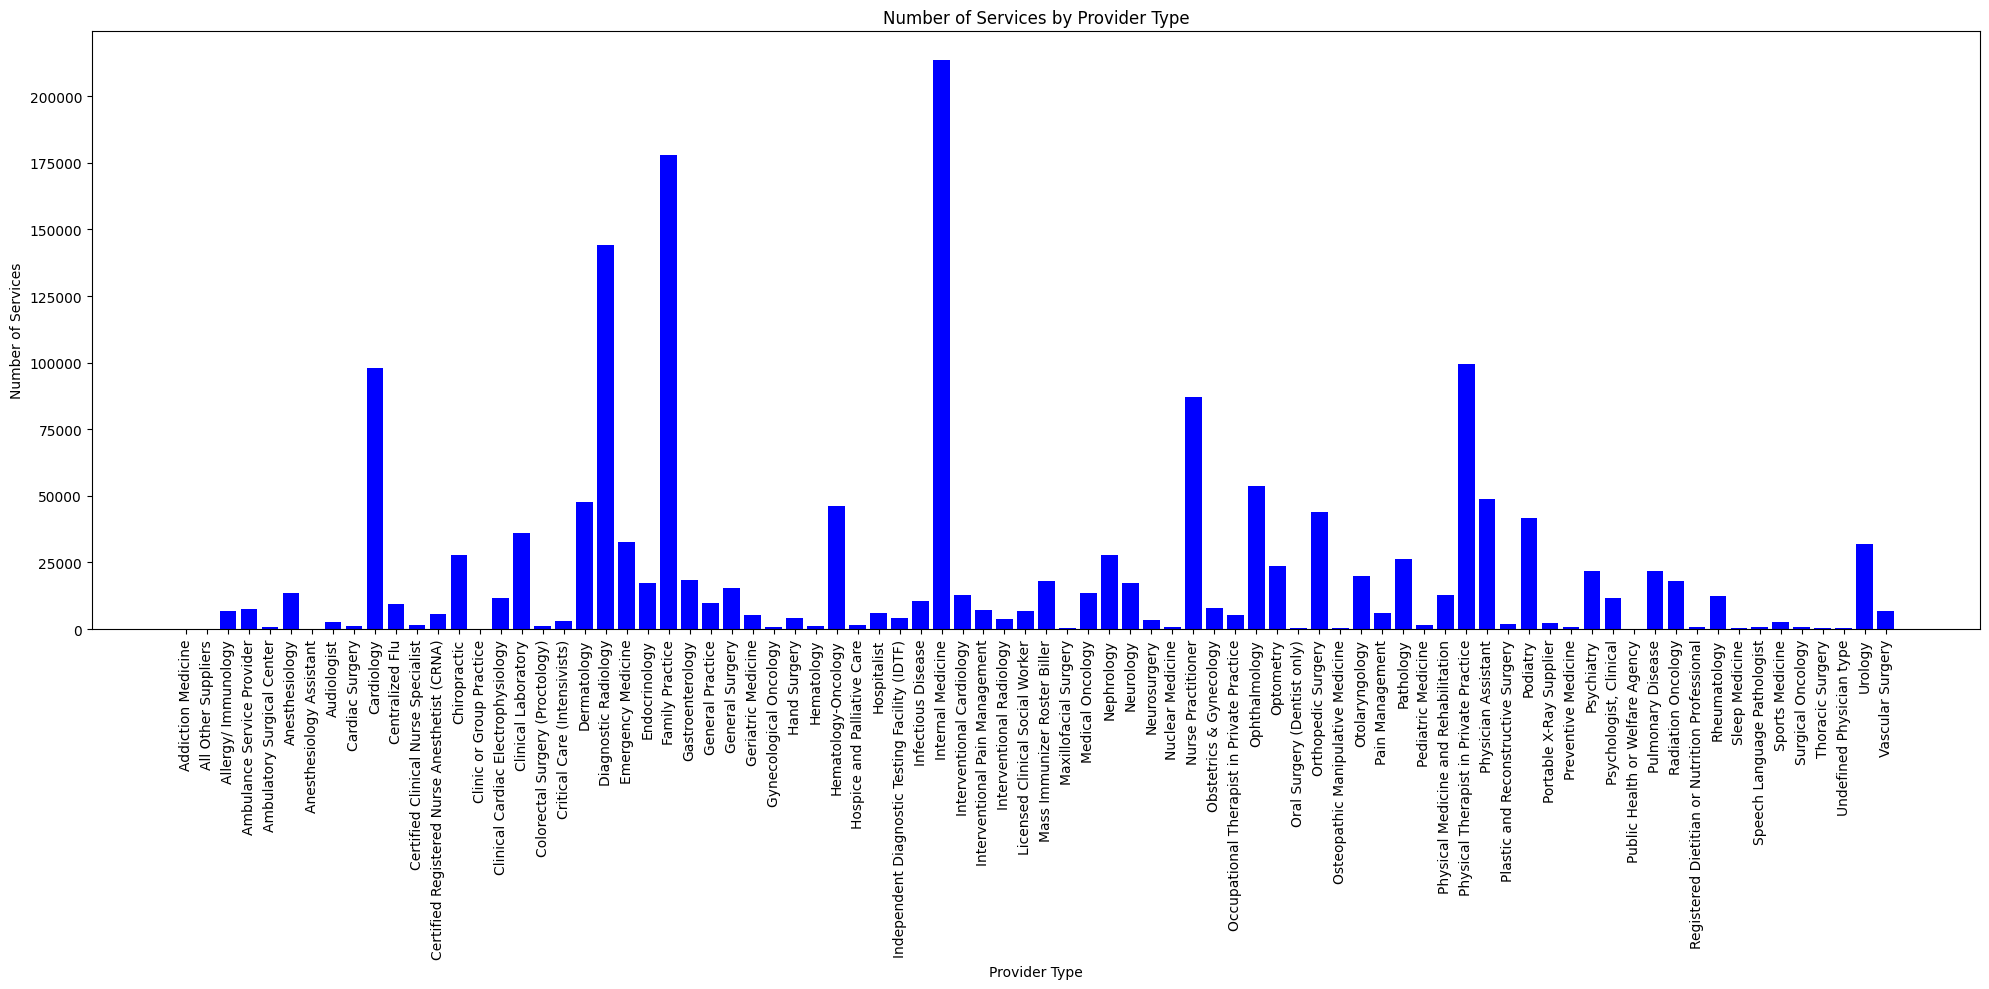

In [62]:
#Example 2: Grouping by Provider Type
#If you're interested in analyzing how services vary by provider type, here's the code to aggregate the services by Provider Type:
# Group by 'Provider Type' and sum the services
provider_type_data = df.groupby('Provider Type')['Number of Services'].sum().reset_index()

# Plot the number of services by provider type
plt.figure(figsize=(20, 10))
plt.bar(provider_type_data['Provider Type'], provider_type_data['Number of Services'], color='blue')
plt.title('Number of Services by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


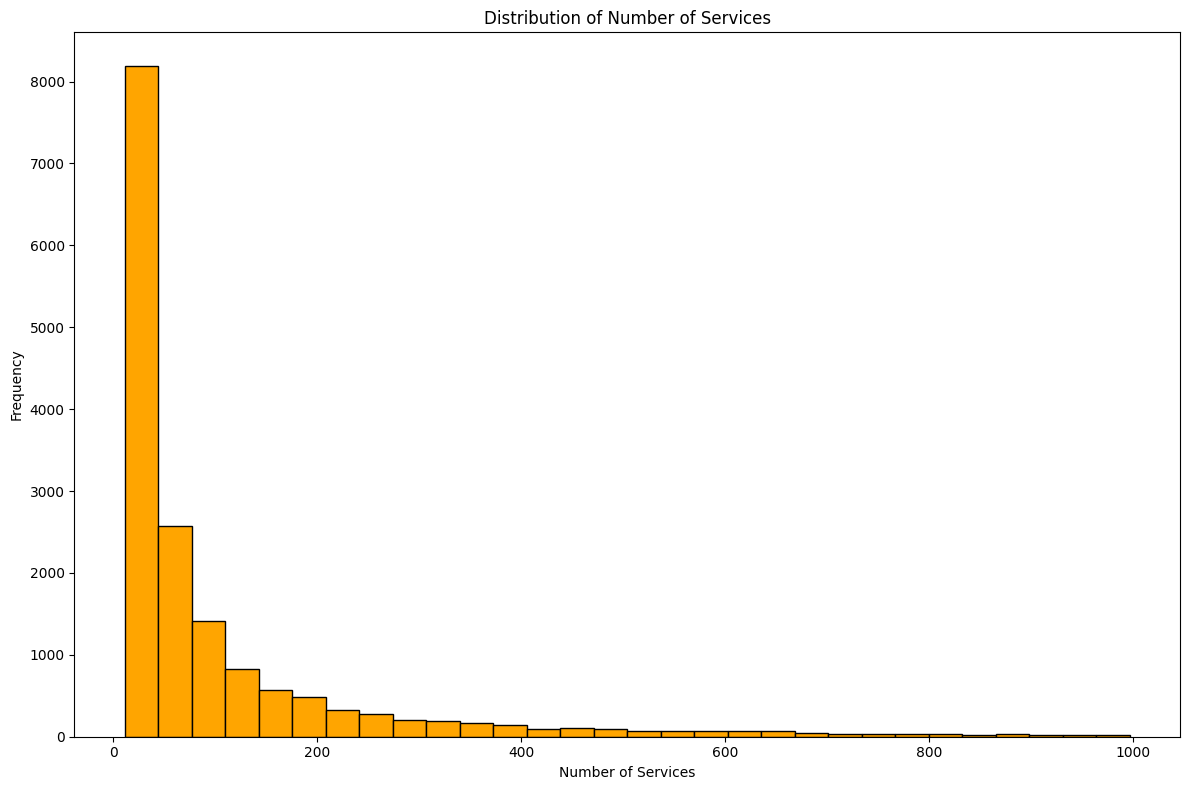

In [63]:
#Example 3: Histogram or Distribution of Number of Services
#If you want to analyze the distribution of the Number of Services across the dataset
# Plot the distribution of the number of services
plt.figure(figsize=(12, 8))
plt.hist(df['Number of Services'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

6. Data Quality and Patterns

Insights:


Missing Data Patterns:

• Visualize patterns in missing values.

• Suggest data improvement or collection strategies.

Duplication and Consistency Checks:

Validate address and credential consistency across providers.

Visualizations:

Heatmaps for missing data.

Cluster maps for address consistency.

Key Deliverables

The visualizations aim to:

Highlight Top Performers: Providers, states, or cities excelling in metrics.

Expose Inefficiencies: Regions, providers, or practices that need attention.

Enhance Decision-Making: Provide actionable insights for policy improvements or business strategies.

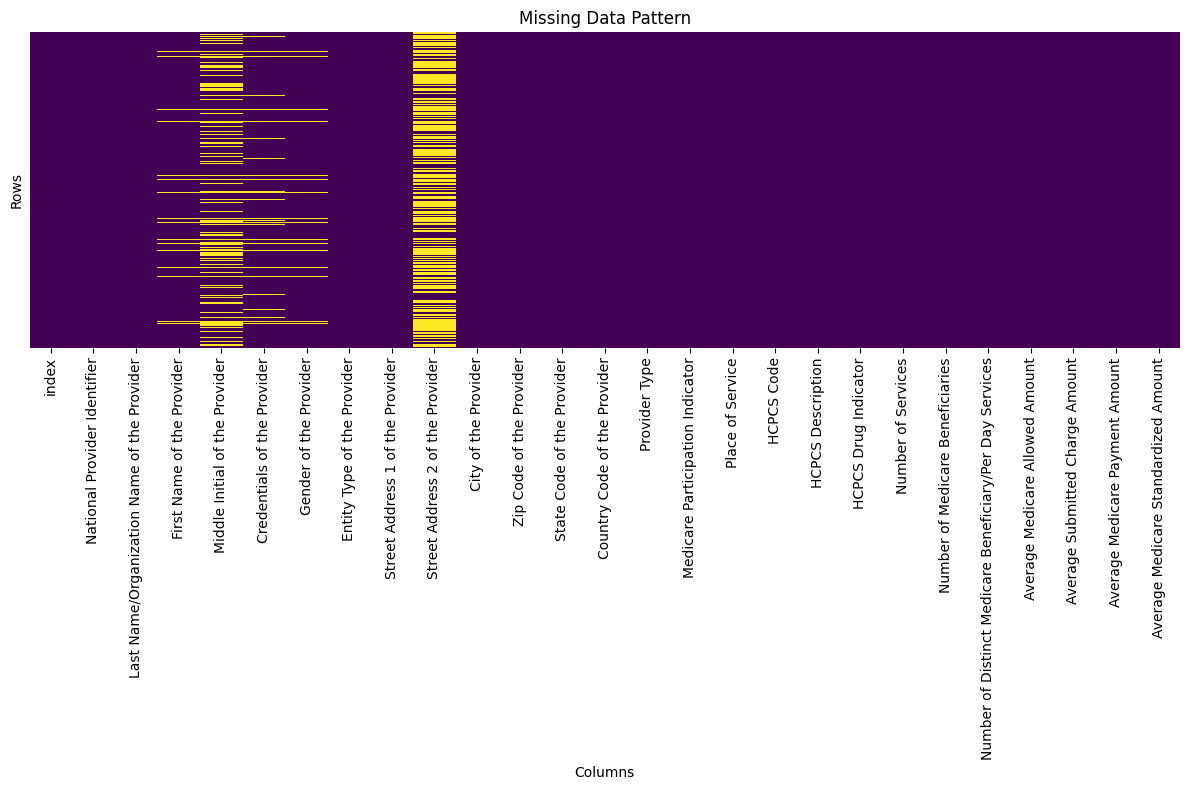

In [64]:
#1. Missing Data Patterns:
#You can visualize missing data with heatmaps to identify any patterns of missing values across different columns. This will help highlight any areas that need attention.
# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()


In [65]:
#2. Address and Credential Consistency Checks:
#To ensure the consistency of provider addresses and credentials, you can check for duplicates or inconsistencies.
# Check for duplicate addresses
address_columns = ['Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'State Code of the Provider', 'Zip Code of the Provider']
address_duplicates = df[address_columns].duplicated().sum()
print(f"Number of duplicate address entries: {address_duplicates}")

# Check for duplicate credentials
credential_duplicates = df['Credentials of the Provider'].duplicated().sum()
print(f"Number of duplicate credentials entries: {credential_duplicates}")


Number of duplicate address entries: 2208
Number of duplicate credentials entries: 15776


Top 10 Providers by Service Count:
National Provider Identifier
1871554329    1951.0
1437121597    1431.0
1346240827    1034.0
1609847243    1024.0
1154388452     997.0
1477755676     995.0
1942278858     992.0
1194926741     991.0
1336302041     990.0
1922051317     989.0
Name: Number of Services, dtype: float64


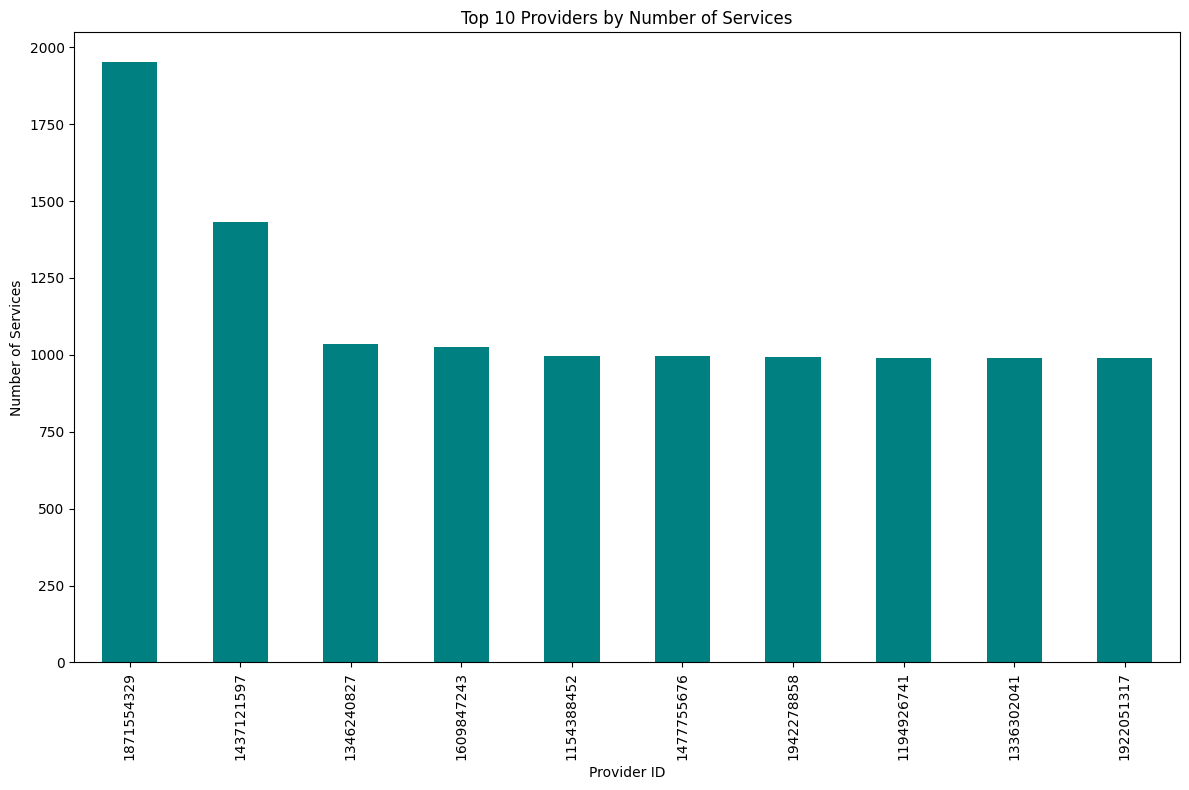

In [67]:
#Highlight Top Performers & Expose Inefficiencies:
#You can highlight the top performers (providers, states, cities) by analyzing key metrics such as Number of Services or Average Medicare Payment Amount.
# Group by provider and sort by number of services
top_providers = df.groupby('National Provider Identifier')['Number of Services'].sum().sort_values(ascending=False).head(10)
print("Top 10 Providers by Service Count:")
print(top_providers)

# Visualize the top 10 providers
plt.figure(figsize=(12, 8))
top_providers.plot(kind='bar', color='teal')
plt.title('Top 10 Providers by Number of Services')
plt.xlabel('Provider ID')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [68]:
#Expose Inefficiencies:
#To expose inefficiencies, you can look at regions, providers, or practices with low numbers of services or high inconsistencies in the data.
# Find providers with a low number of services (e.g., below a threshold)
inefficient_providers = df[df['Number of Services'] < 10]
print(f"Providers with low service count (below 10): {inefficient_providers[['National Provider Identifier', 'Number of Services']]}")


Providers with low service count (below 10): Empty DataFrame
Columns: [National Provider Identifier, Number of Services]
Index: []


In [69]:
#Expose Inefficiencies:
#To expose inefficiencies, you can look at regions, providers, or practices with low numbers of services or high inconsistencies in the data.
# Find states with low service counts (e.g., below a threshold)
inefficient_states = df.groupby('State Code of the Provider')['Number of Services'].sum()
inefficient_states = inefficient_states[inefficient_states < 100]  # Customize threshold
print(f"States with low service count: {inefficient_states}")


States with low service count: State Code of the Provider
AE    49.0
ZZ    75.0
Name: Number of Services, dtype: float64
